## Unsupervised Linear Models

**Author:** Himanshu Singhal

## Toy Dataset
For this problem, you will use the data file hb.csv. The input is 2,280 data points, each of which is 7
dimensional (i.e., input csv is 2280 rows by 7 columns).

In [1]:
%matplotlib inline
import pandas as pd
data = pd.read_csv('hb.csv',header=None)
data.head()

,0,1,2,3,4,5,6
0,-7.140017,-6.556057,-2.046734,0.013247,4.874084,-3.163759,-6.855168
1,-9.426917,-22.520059,19.141155,5.425329,-3.300380,7.728743,-17.906016
2,-15.257052,-31.008478,22.409389,6.659027,-1.522000,7.837675,-25.505991
3,14.255144,1.431331,22.453813,4.520838,-17.917544,16.327738,6.240389
4,-12.617628,-13.478353,-0.634942,0.761668,7.284270,-3.965561,-13.323129


### Task 1
Assuming that the 7-dimensional space is excessive, you would like to reduce the dimension of the space. However, what dimensionality of space should we reduce it to? To determine this we need to compute its intrinsic dimensionality.

Note: this information content is called the “explained variance” of each component, but you can also get this from the magnitude of the singular values. This plot is sometimes called a “Scree Plot”. 

shape of original data: (2280, 7)
shape of the variance matrix: (7,)


Text(0, 0.5, '% contribution of PC')

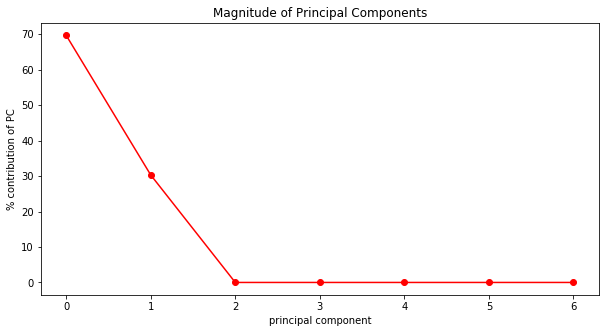

In [2]:
# Code Here
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
from PIL import Image
import seaborn as sns

# convert the data to arrays
X = data.values
# scale the values
X = StandardScaler().fit_transform(X)
# perform PCA on all components
pca = PCA(n_components=7)
pca.fit_transform(X)
# calculate the ratio between the variance of the PC and the total variance
var = pca.explained_variance_ratio_
# compute the cumulative sum of the arrays
var = np.round(pca.explained_variance_ratio_,decimals=4)*100
print('shape of original data:', X.shape)
print('shape of the variance matrix:', var.shape)
plt.figure(figsize=(10,5))
plt.plot(var, 'ro-')
plt.title('Magnitude of Principal Components')
plt.xlabel('principal component')
plt.ylabel('% contribution of PC')

In [3]:
# ## Scree plot for the original data X
# import matplotlib
# U, S, V = np.linalg.svd(X) 
# eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
#                                # This question is about SVD.

# fig = plt.figure(figsize=(8,5))
# sing_vals = np.arange(7) + 1
# plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Eigenvalue')

# leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
#                  shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
#                  markerscale=0.4)
# leg.get_frame().set_alpha(0.4)
# # leg.draggable(state=True)
# plt.show()

### Task 2
Now use PCA to project the 7-dimensional points on the K-dimensional space (where K is your answer from above) and plot the points. (For K=1,2, or 3, use a 1, 2, or 3D plot, respectively. For 4+ dimensions, use a grid of pairwise 2D Plots).

shape of the reduced dataset: (2280, 2)


Text(0.5, 1.0, 'Projection of 7-D points on the 2-D space')

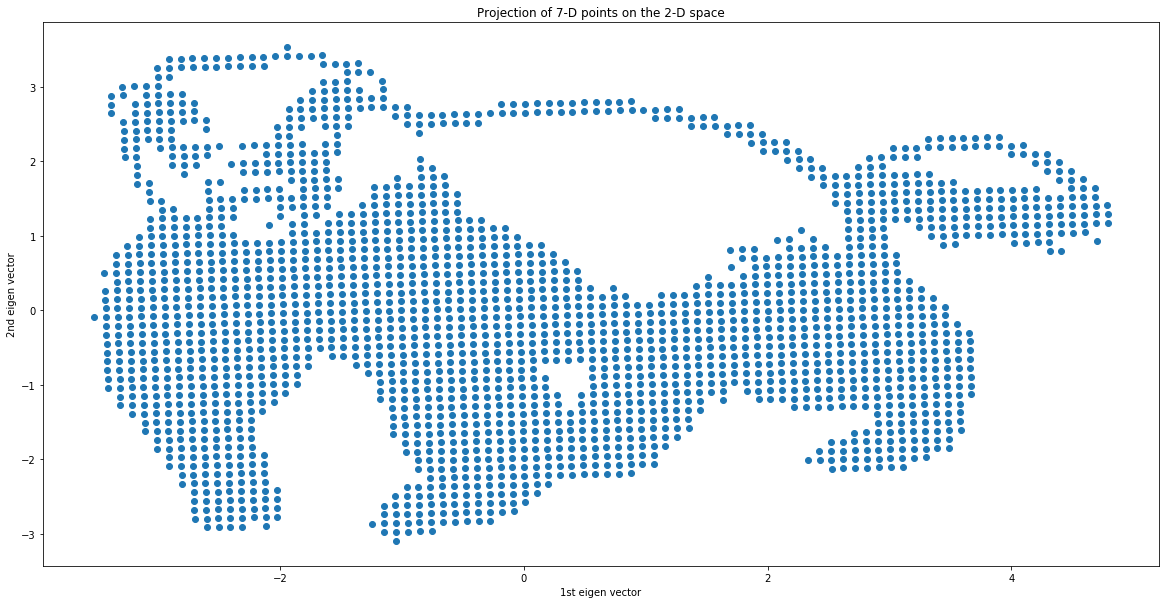

In [4]:
# Code Here
pca_new = PCA(n_components=2)
X1 = pca_new.fit(X)
X1 = pca_new.fit_transform(X)
print('shape of the reduced dataset:', X1.shape)
plt.figure(figsize=(20,10))
plt.scatter(X1[:,0],X1[:,1])
plt.xlabel('1st eigen vector')
plt.ylabel('2nd eigen vector')
plt.title('Projection of 7-D points on the 2-D space')

## Topology Optimization Dataset
For this problem, you will be using unsupervised linear models to help understand and interpret the results of a mechanical optimization problem. Specifically, to understand the solution space generated by a topology optimization code; that is, the results of finding the optimal geometries for minimizing the compliance of various bridge structures with different loading conditions. The input consists of 1,000 images of optimized material distribution for a beam as described in *Figure 1*. A symmetrical boundary condition, left side, is used to reduce the analysis to only half. Also, a rolling support is included at the lower right corner. Notice that the rolling support is the only support in the vertical direction. 

&nbsp;

![](beam_description.jpg)
<center>Figure 1: Left: Nx-by-Ny design domain for topology optimization problem. Right: Example loading configuration and resulting optimal topology. Two external forces, Fi, were applied to the beam at random nodes represented by (xi, yi) coordinates.<sup>1</sup></center>

&nbsp;

<sup>1. This problems data is based on the problem setup seen in the following paper: Ulu, E., Zhang, R., & Kara, L. B. (2016). A data-driven investigation and estimation of optimal topologies under variable loading configurations. *Computer Methods in Biomechanics and Biomedical Engineering: Imaging & Visualization*, 4(2), 61-72.</sup>

### Task 1: Scree/Singular Value Plot
As with the toy example, assume that the 94,178-dimensional space is excessive. You would like to reduce the dimension of the image space. First compute its intrinsic dimensionality. Plot the relative value of the information content of each of the principal components and compare them.

shape of the image matrix: (1000, 94178)


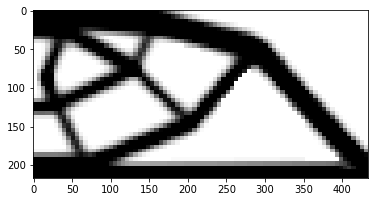

In [5]:
im_dir = './topo_opt_runs/'
img = [os.path.join(im_dir,f) for f in os.listdir(im_dir) if f.endswith(".png")]

img_array = np.array([np.array(Image.open(im, 'r')).flatten() for im in img], 'f')
img_test = np.array(Image.open(img[-1], 'r'))
print('shape of the image matrix:', img_array.shape)
plt.imshow(img_test)
plt.gray()
plt.show()

shape of the standardized image matrix: (1000, 94178)
shape of the variance matrix: (71,)


Text(0, 0.5, '% contribution of PC')

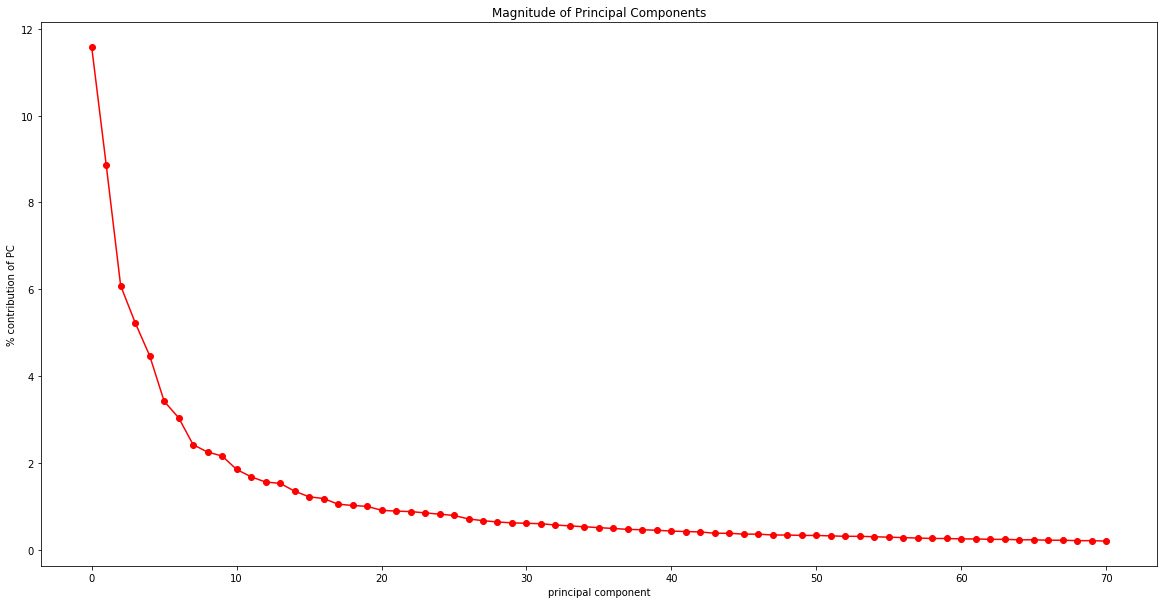

In [6]:
I = StandardScaler().fit_transform(img_array)
I = pd.DataFrame(I)

pca = PCA(n_components = 0.85)
pca_I = pca.fit_transform(I)
pca_df = pd.DataFrame(pca_I)
# calculate the ratio between the variance of the PC and the total variance
var_I = pca.explained_variance_ratio_
# compute the cumulative sum of the arrays
var_I = np.round(var_I,decimals=4)*100
print('shape of the standardized image matrix:', I.shape)
print('shape of the variance matrix:', var_I.shape)
plt.figure(figsize=(20,10))
plt.plot(var_I, 'ro-')
plt.title('Magnitude of Principal Components')
plt.xlabel('principal component')
plt.ylabel('% contribution of PC')

In [7]:
#plot the relative value of the information content of each of the principal components
plt.figure(figsize = (10,10))
# sns.pairplot(pca_df)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

### Task 2: Principal Components
Now plot the first 5 principal components.

Generate a One Hot Enconding vector for each principal component. Later, use the function *inverse_transform()* to obtain the image as a vector (length 94,178), which you will have to reshape into the original image dimensions to plot (217 pixels high and 434 pixels wide).

original shape: (1000, 94178)
transformed shape: (1000, 5)


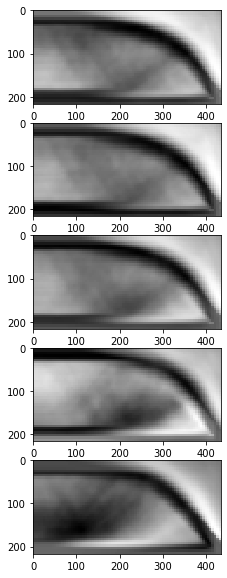

In [8]:
pca = PCA(n_components=5)
XI = pca.fit_transform(I)

print('original shape:', I.shape)
print('transformed shape:', XI.shape)

XI = pca.inverse_transform(XI)
fig,axes = plt.subplots(5,1, figsize=(10,10))
for j,ax in enumerate (axes.flat):
    ax.imshow(XI[j].reshape(217,434))

### Task 3: Image Reconstruction
After the dimensionality reduction has been performed (using the K you find in Task 2), reconstruct the first 5 images from the dataset and plot them against the original images. That is, first, (A) plot the original image itself and then (B) project the original image onto its principal components (i.e., translate from image space to PCA space), and (C) un-project/inverse-transform the PCA coordinates back into image space and plot the resulting image.

Hint: The unprojected image should bear some resemblance to the original image but not be 100% the same.

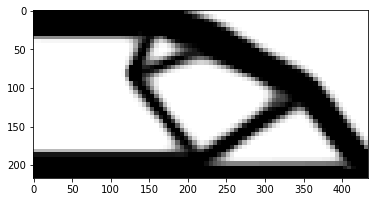

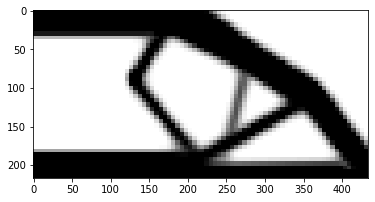

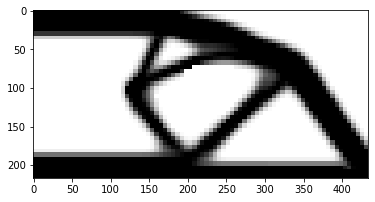

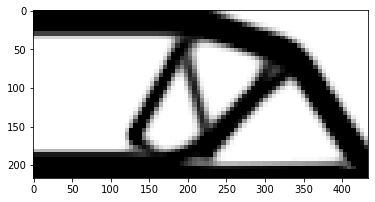

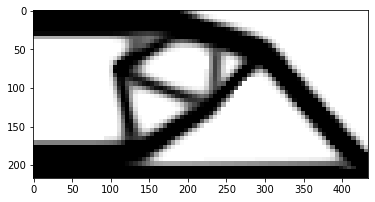

In [9]:
#plotting the original image itself
for m in range(5):
    img_orig = np.array(Image.open(img[m],'r'))
    plt.imshow(img_orig)
    plt.show()

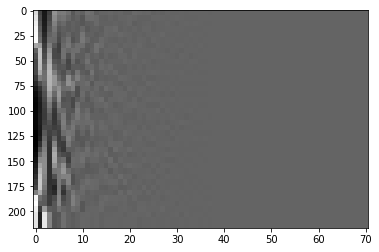

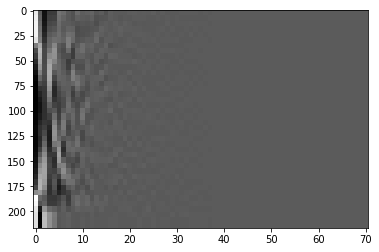

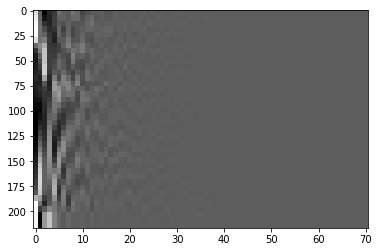

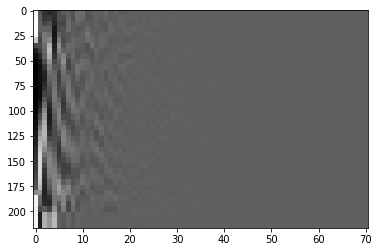

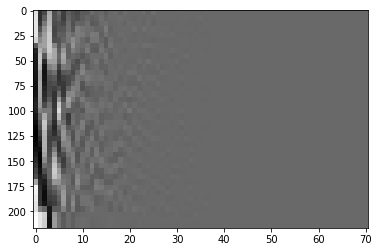

In [10]:
#project the original image into its principal components
for n in range(5):
    img_orig = np.array(Image.open(img[n],'r'))
    img_tran = StandardScaler().fit_transform(img_orig)
    pca = PCA(n_components=71)
    img_tran_pca = pca.fit(img_tran).transform(img_tran)
    plt.imshow(img_tran_pca, aspect='auto')
    plt.show()

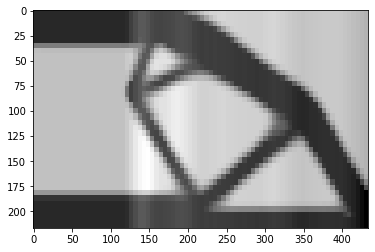

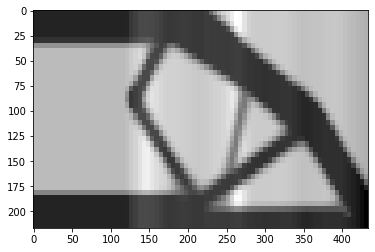

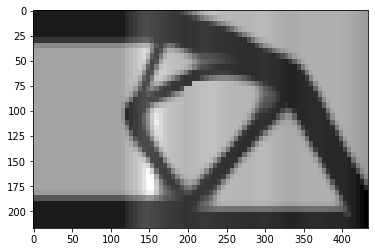

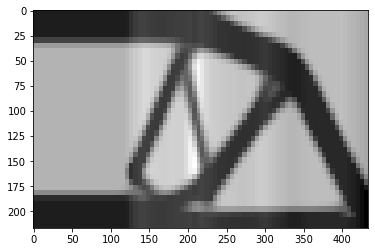

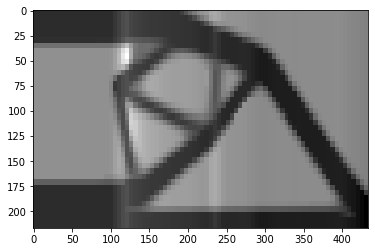

In [11]:
# plot the unprojected images
for k in range(5):
    img_orig = np.array(Image.open(img[k],'r'))
    img_tran = StandardScaler().fit_transform(img_orig)
    pca = PCA(n_components=71)
    pca.fit(img_tran)
    img_tran = pca.transform(img_tran)
    img_proj = pca.inverse_transform(img_tran)
    plt.imshow(img_proj, aspect='auto')
    plt.show()

### Task 4: Projection Plot
Now use PCA to project the images on the 2-dimensional space (the first 2 principal components) and plot a 50 random images. (If you try to plot all the data it will be unwieldy, so just randomly subsample 50 of the datapoints). 

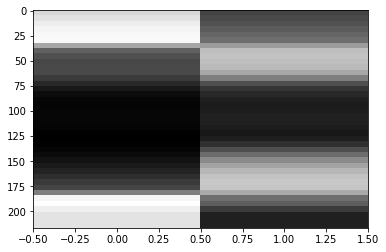

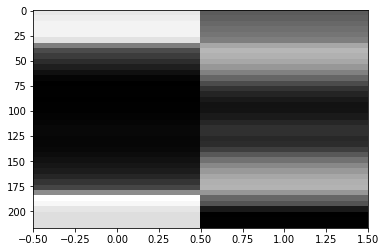

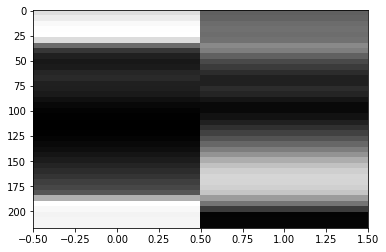

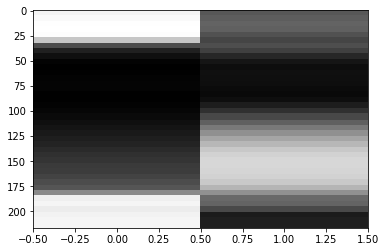

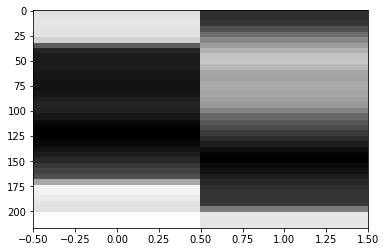

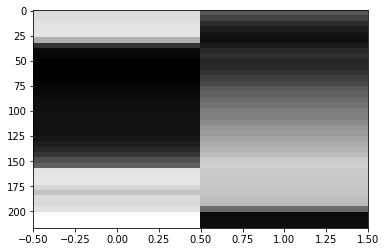

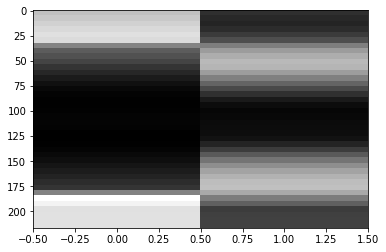

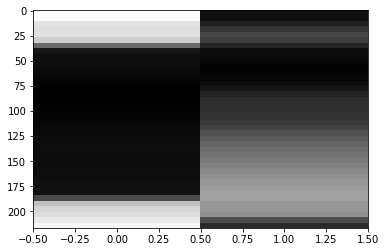

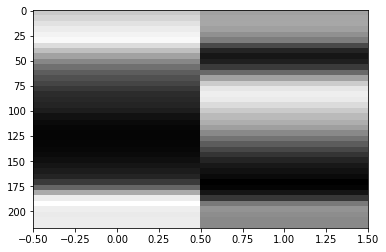

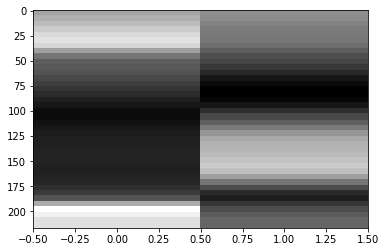

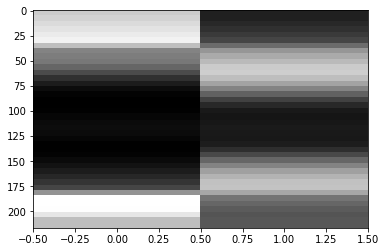

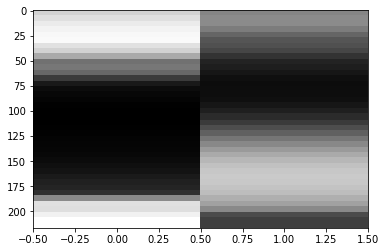

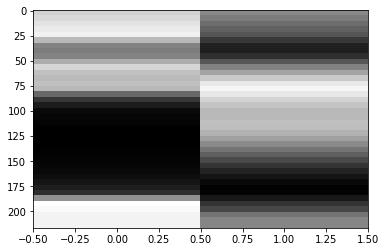

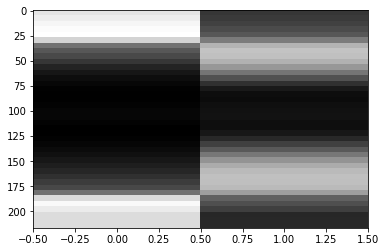

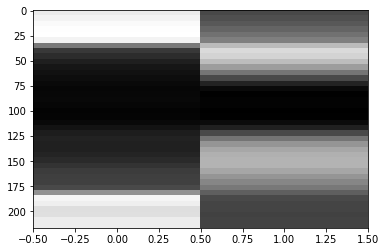

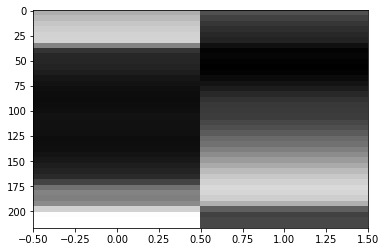

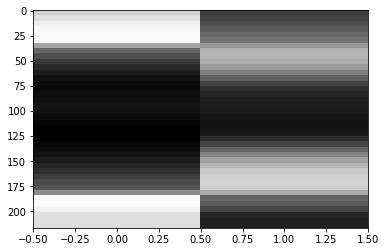

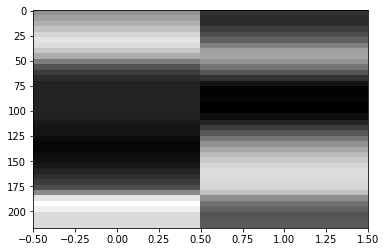

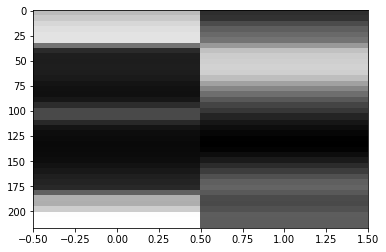

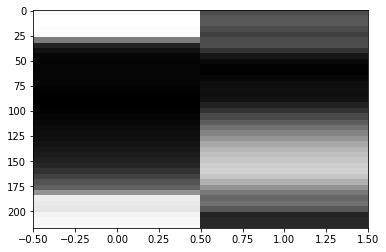

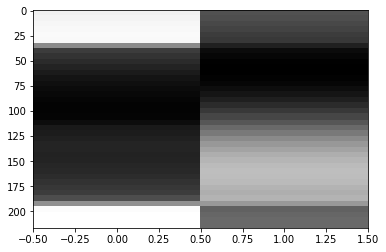

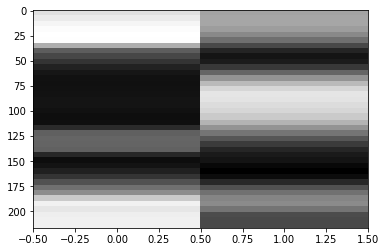

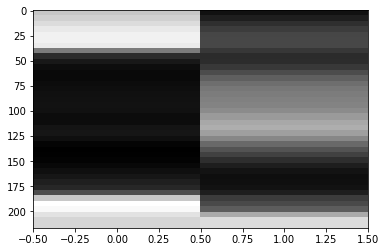

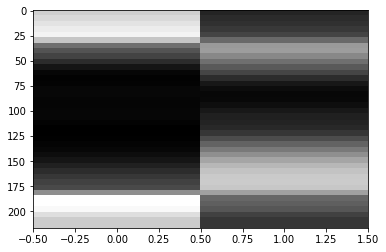

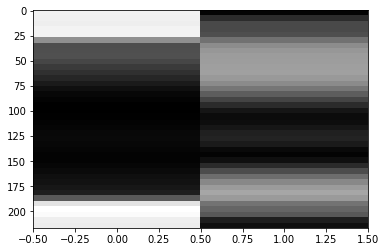

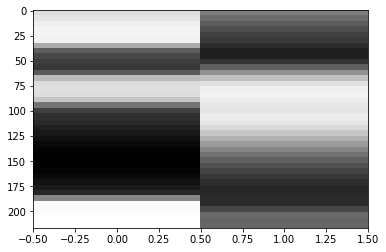

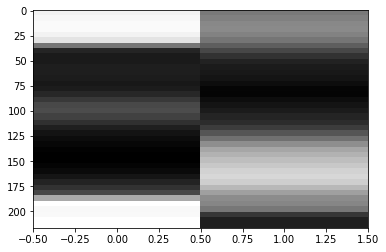

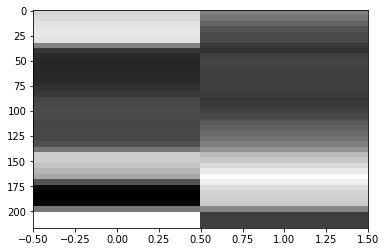

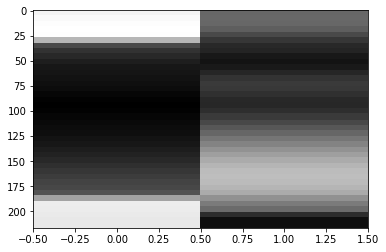

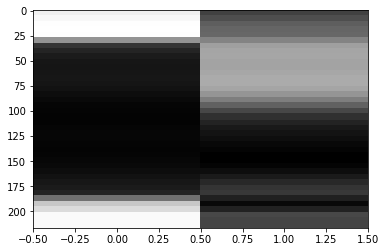

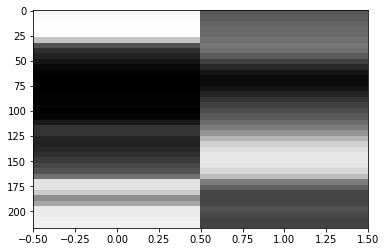

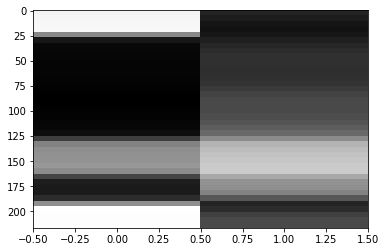

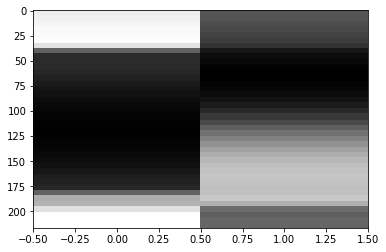

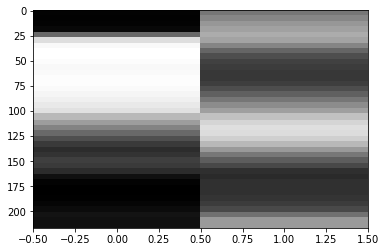

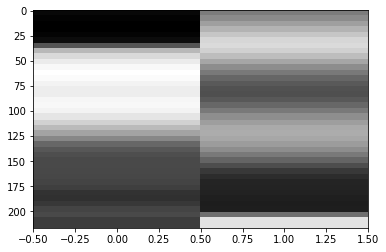

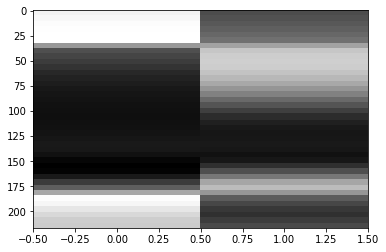

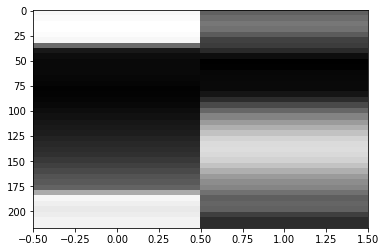

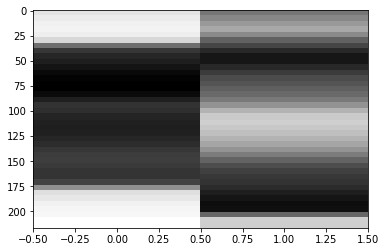

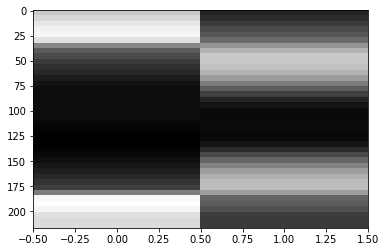

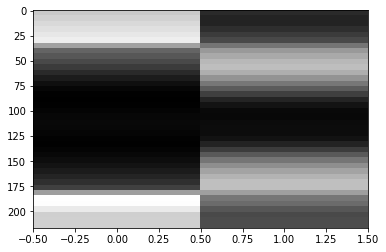

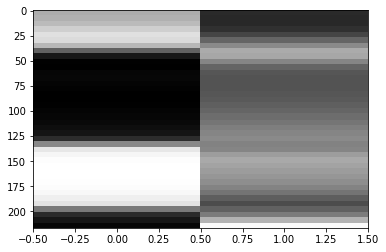

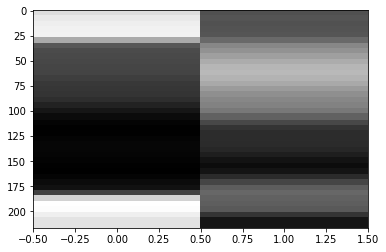

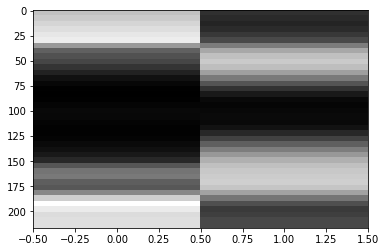

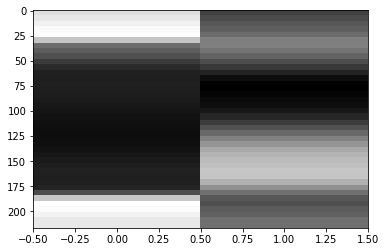

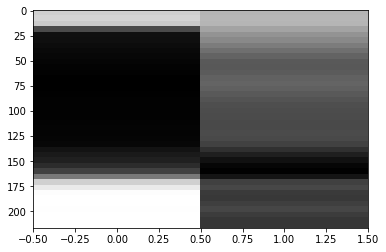

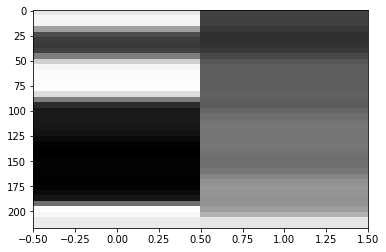

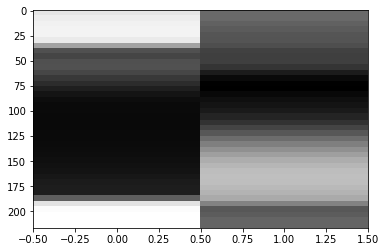

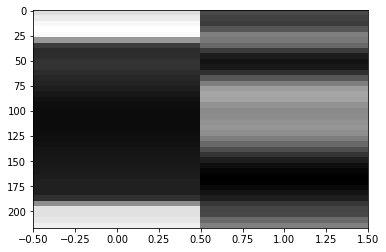

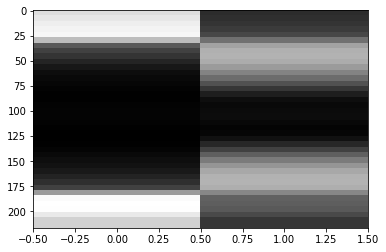

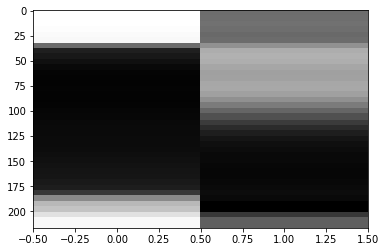

In [12]:
# use PCA to project the images on the 2-Dimensional space
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import random

sample = [a for a in range(1000)]

sample_list = []

for b in range(50):
    sample_list.append(random.choice(sample))
    
len(sample_list)
x = 0; y = 0;
for c in range(len(sample_list)):
    img_sample = np.array(Image.open(img[c], 'r'))
    img_tran = StandardScaler().fit_transform(img_sample)
    pca = PCA(n_components=2)
    pca.fit(img_tran)
    img_tran = pca.fit(img_tran).transform(img_tran)
    plt.imshow(img_tran, aspect='auto')
    plt.gray()
    plt.show()
    

## Appendix: Helpful Plotting Functions
The below code demonstrates how to plot images on a 2D plane given coordinates.

TypeError: Image data of dtype <U47 cannot be converted to float

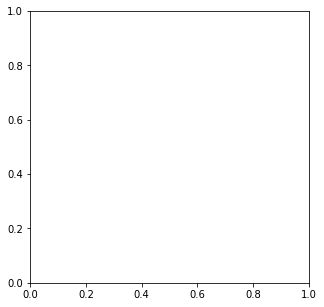

In [13]:
# To help with some of the image plotting on a 2D plane, you can use Offset Image
# as shown below, or you can use your own method if you prefer as long as it is clear
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# Create Figure and Axis Object
fig,ax = plt.subplots(1, 1,figsize=(5,5))
# This creates a box that loads an image into it
imagebox = OffsetImage(img, zoom=.25,cmap=plt.get_cmap('Greys_r')) 
# AnnotationBbox lets you place the OffsetImage at a given x,y point on the axis
x=0; y=0;
ab = AnnotationBbox(imagebox, [x,y], frameon=False,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")                                  
# Now add the annotation to the axis
ax.add_artist(ab)
ax.set_ylim([-1,1])
ax.set_xlim([-1,1])